<a href="https://colab.research.google.com/github/toddpglidden/toddpglidden.github.io/blob/main/Hacker_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datacamp, Intermediate Python, Case Study

What are the chances of getting to at least step 60 when you play a dice game that works as follows?

You throw a die one hundred times. If it's 1 or 2 you'll go one step down. If it's 3, 4, or 5, you'll go one step up. If you throw a 6, you'll throw the die again and will walk up the resulting number of steps.

You can not go lower than step number 0. Also, you have a chance of 0.1% of falling down the stairs when you make a move. Falling down means that you have to start again from step 0.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

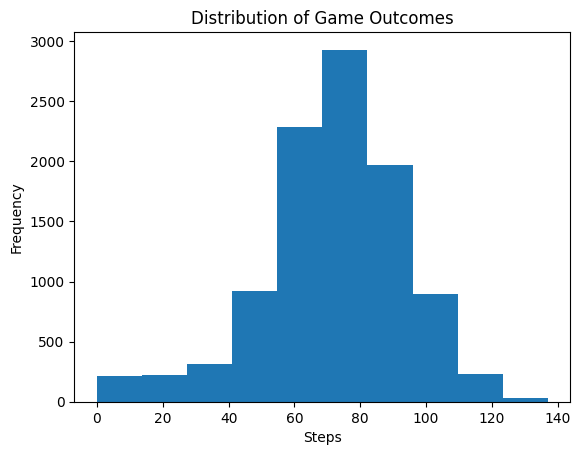

In [13]:
# Simulate a run of the game 10000 times
all_walks = [] # Keep track of all game outcomes
for i in range(10000) :
    random_walk = [0] # Keep track of outcomes during each simulation
    for x in range(100) : # Roll the die 100 times
        step = random_walk[-1] # Start with the last item in the list
        dice = np.random.randint(1,7) # Simulate a roll of the die
        if dice <= 2:
            step = max(0, step - 1) # Make sure you never go below 0
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        if np.random.rand() <= 0.001 : # Simulate falling down
            step = 0
        random_walk.append(step) # Record the outcome
    all_walks.append(random_walk) # Record the outcome of that run

# Plot of all walks
np_aw_t = np.transpose(np.array(all_walks))

# The last row of np_aw_t is the step you landed on in each game
outcomes = np_aw_t[-1,:]

# Plot histogram of outcomes
plt.hist(outcomes)
plt.title('Distribution of Game Outcomes')
plt.xlabel('Steps')
plt.ylabel('Frequency')
plt.show()

In [7]:
# What percent of the time did you get to step 60 or higher?
count = 0
for score in outcomes:
  if score >= 60:
    count += 1
print(count/len(outcomes))

0.766


About 77% of the time you would get to step 60 or higher